<a href="https://colab.research.google.com/github/gillis42/csv_loc/blob/master/PUBLIC_How_is_Sherpa_LTE1_doing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process and plot TLE data for Sherpa LTE1  

Throw away login details:

*   searchingforsherpaman@gmail.com
*   SherpaLTE1_July2021
*   noad_cat_id = 48941

(these may expire, recommend making a copy of this notebook and getting your own login details at  https://www.space-track.org)

You can search for spacecraft on  https://www.space-track.org and find the norad_cat_id number to plot. Some fun things to plot:

*  Sherpa-LTE1 48941
*  Sherpa-FX2 48958
*  Sherpa-LTC2 53752 
*  Bluewawalker-3 53807
*  Photon 47974
*  Thrust ME 46834
*  TACSAT 2 29653 
*  Exotrail 46913
*  A Skysat 42991
*  Momentus
*  MOMENTUS-X1 44408 
*  Momentus Vigoride-3 (Transporter-5) 52760   
*  D-orbit Ion
*  47504 	ION SCV-002
*  48912 	ION SCV-003 (Transporter 2)
*  50993 	ION SCV-004
*  52163 	ION SCV-005
*  SCV006 (Transporter-5) 70330
*  Capella 
*  43791 	CAPELLA-1	
*  46269 	CAPELLA-2	
*  47481 	CAPELLA-4 (WHITNEY)	
*  47489 	CAPELLA-3 (WHITNEY)	
*  48605 	CAPELLA-6 (WHITNEY)	
*  48913 	CAPELLA-5 (WHITNEY)	(Transproter 2)
*  51071 	CAPELLA-8 (WHITNEY)	
*  51072 	CAPELLA-7 (WHITNEY)
*  Astra Sat 49494
*  ISS 25544 (Takes a while as 20 years of data)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[]

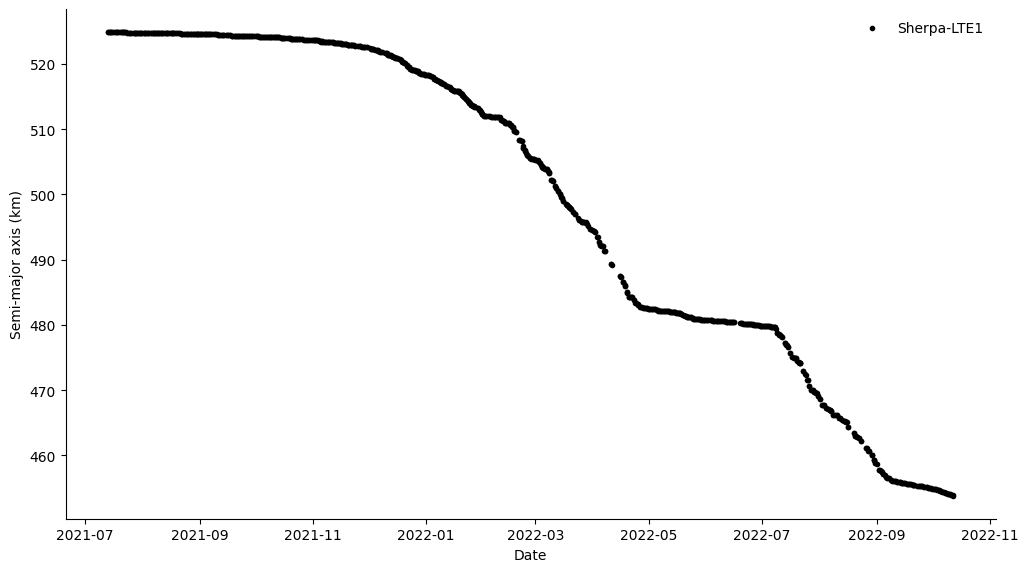

In [3]:
import sys
import re
import csv
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
import os

#@title Requires email and password from https://www.space-track.org.

spacetrack_email = 'searchingforsherpaman@gmail.com' #@param {type:"string"}
spacetrack_password = 'SherpaLTE1_July2021' #@param {type:"string"}
satellite1_norad_cat_id =  48941#@param {type:"integer"}
satellite1_label = 'Sherpa-LTE1' #@param {type:"string"}


drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/Colab Notebooks/"

# Install and loginto Spacetrack app (note, they do restrict logins so you can get blocekd)
!pip install spacetrack
import spacetrack.operators as op
from spacetrack import SpaceTrackClient
import spacetrack.operators as op

#Matthew login
st = SpaceTrackClient(identity=spacetrack_email, password=spacetrack_password)

fig = plt.figure(figsize=(12,6.75), dpi=100)
# fig = plt.figure(figsize=(9,5), dpi=100)
ax = fig.add_subplot(1,1,1)

# Streaming downloads line by line
# 48941 is SHERPA LTE1
if satellite1_norad_cat_id != 0:
  lines = st.tle(iter_lines=True, norad_cat_id=satellite1_norad_cat_id, format='kvn')
  with open('kvn.txt', 'w') as fp:
      for line in lines:
          fp.write(line + '\n')

  # Extract data from files using bash (janky but it's the way I know best)
  !grep 'MEAN_MOTION                        =' kvn.txt > MEANMOTION.txt
  !grep 'EPOCH                              =2' kvn.txt > EPOCH.txt
  !sed -i 's:.*=::' MEANMOTION.txt 
  !sed -i 's:.*=::' EPOCH.txt 

  # Process files to get Semi Major axis data (this is the only value we need)
  filename = '/content/gdrive/My Drive/Colab Notebooks/'
  data_tle = pd.read_csv(filename + 'MEANMOTION.txt')
  data_epoch = pd.read_csv(filename + 'EPOCH.txt')
  data = pd.concat([data_epoch, data_tle], axis=1)
  data.columns = ['Date', 'Mean Motion'] 
  data["Date"] = pd.to_datetime(data['Date'])#, unit='s')
  data['rad per s'] = data['Mean Motion']*((2*np.pi)/86400)
  data['Semi-major axis'] = (((398600.4418)**(1/3))/(data['rad per s']**(2/3)))-6378.137 

  # Plot
  ax.plot(data['Date'][10:], data['Semi-major axis'][10:], color='0', marker='o', ls='', markersize=3, label=satellite1_label)

  # Remove remporary files
  !rm kvn.txt MEANMOTION.txt EPOCH.txt


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Semi-major axis (km)', fontsize=10)
ax.set_xlabel('Date', fontsize=10)
ax.legend(loc='upper right', frameon=False)
# ax.set_ylim([200, 500])


plt.plot()

